# Homework8 
# Exercise 1

(a) .pdf

(b) Bayesian Classifier (this is the code from Homework6) 

In [34]:
import scipy.io as sio
from scipy.stats import multivariate_normal, norm
import numpy as np
import matplotlib.pyplot as plt
Dataset = sio.loadmat('HW8.mat')

train_x = Dataset['train_x']
train_y = Dataset['train_y']
test_x = Dataset['test_x']
test_y = Dataset['test_y']

#(i)
# Estimation of the priori probabilities P(ω_1) and P(ω_2) 
N1 = np.sum(i == 1 for i in train_y)
N2= np.sum(i == 2 for i in train_y)
N = len(train_y)
P1 = N1/N #P(ω_1)
P2 = N2/N #P(ω_2)

#ML estimates of μ1,μ2,Σ1 and Σ2
m1 = np.mean(train_x[0:100,:],0)
m2 = np.mean(train_x[100:200,:],0)

#multivariate normal distribution's covariance matrices 
S1 = 1/N1*((train_x[0:100,:] - 
            np.matlib.repmat(m1,100,1)).T).dot((train_x[0:100,:] - 
                                                     np.matlib.repmat(m1,100,1)))
S2 = 1/N2*((train_x[100:200,:] - 
            np.matlib.repmat(m2,100,1)).T).dot((train_x[100:200,:] - 
                                                     np.matlib.repmat(m2,100,1)))
#(ii)

#Calculate the propabilities of each point to belong on each class.
N_test = len(test_y)
class1 =  multivariate_normal(m1,S1)
I = class1.pdf(test_x)*P1 #I is a N-dim vector which the values: p(x_i/ω_1)*P(ω_1) for all x_is of the training set
class2 =  multivariate_normal(m2,S2)
J = class2.pdf(test_x)*P2 #J is similar to I but for class ω_2 (values of p(x_i/ω_2)*P(ω_2))

#Classify the samples of the test set
Btest_y = np.zeros((N_test,1)) # Create a vector for storing the labels of the samples of the test set

Btest_y[I>J] = 1
Btest_y[I<J] = 2

#(iii)
#Error Estimation
#The percentage of points that have been classified to the wrong class.
Error_Bayes = (np.sum(i==1 for i in Btest_y != test_y))/N_test
print(Error_Bayes)

[ 0.15]


(200, 2)

# Logistic Regression classifier from Scratch

In [35]:
#make train_y and test_y to be compatible for use
Y = train_y.flatten('False')
Y.tolist()
Y[Y==1] = 0
Y[Y==2] = 1

target = test_y.flatten('False')

def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))


#predict log-reg parameters with gradient descent
#x : training dataset
#y : training results (y)
#num_steps: nummber of steps for gradient descent
#because we know that our function we want to minimize with Gradient Descent has only one minimum we dont need to try many thetas
def logistic_regression(x, y, num_steps, learning_rate):
    #starting thetas(we could give anything)
    theta =  [1, 1.0, 1.0]
    #add ones on our X so we can predict our theta0(intercept too)
    ones = np.ones((x.shape[0], 1))
    x = np.hstack((ones, x))       
    
    #Gradient descent
    for step in range(num_steps):
        #Predict on every loop the ys for the current theta
        scores = np.dot(x,theta)
        predictions =sigmoid(scores)
        #theta = theta_prev - (s-y)X
        temp = predictions - y
        gradient = np.dot(x.T, temp)
        theta =theta - learning_rate * gradient
      
    return theta

#Thetas that our model have train
thetas = logistic_regression(train_x, Y,
                     num_steps = 300000, learning_rate = 0.05)

#For the parameters we got from the training data try to predict the classes of the test set.
ones = np.ones((test_x.shape[0], 1))
test_x = np.hstack((ones, test_x))
scores = np.dot(test_x, thetas)
predictions = sigmoid(scores)

predictions[predictions>0.5] = 2
predictions[predictions<0.5] = 1

#Calculate the error of this method
Error_Log = (np.sum(i==1 for i in predictions != target))/N_test
print(np.mean(Error_Log))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Non length-one string passed in for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Non length-one string passed in for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  import sys


0.21


We observe that the logistic regression classifier has error 0.21 for the parameters given above(number of iteration and learning_rate for the gradient descent optimazation technique).
Maybe we could achieve better results if we tune our model by trying different starting thetas, num_steps and learning rate.

Bayes classifier has a smaller error score = 0.15.
To conclude, when we know the distributions that our data comes from, Bayes is a more accurate classifier. 



# Exercise 2

(a)

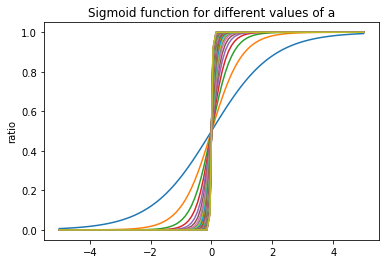

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def sigmoid(scores,a):
    return 1 / (1 + np.exp(-scores*(a)))

x = np.linspace(-5,5,100)
for i in range(1,50):
    y = sigmoid(x,i)
    plt.plot(x,y)
    
 
plt.ylabel('ratio')
plt.title('Sigmoid function for different values of a')
plt.show()

The rest exercise on the .pdf file.